In [29]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('multipleChoiceResponses.csv')

/sysroot/home/ekaterina/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [32]:
for col in df.columns:
    print(col,df.at[0,col])

Time from Start to Finish (seconds) Duration (in seconds)
Q1 What is your gender? - Selected Choice
Q1_OTHER_TEXT What is your gender? - Prefer to self-describe - Text
Q2 What is your age (# years)?
Q3 In which country do you currently reside?
Q4 What is the highest level of formal education that you have attained or plan to attain within the next 2 years?
Q5 Which best describes your undergraduate major? - Selected Choice
Q6 Select the title most similar to your current role (or most recent title if retired): - Selected Choice
Q6_OTHER_TEXT Select the title most similar to your current role (or most recent title if retired): - Other - Text
Q7 In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice
Q7_OTHER_TEXT In what industry is your current employer/contract (or your most recent employer if retired)? - Other - Text
Q8 How many years of experience do you have in your current role?
Q9 What is your current yearly compensation (ap

In [ ]:
df.drop([0],inplace=True)
df.head()

16
885639
41770
83264


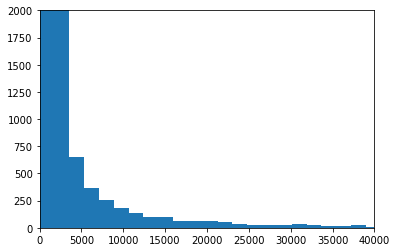

In [3]:
df['Time'] = df['Time from Start to Finish (seconds)'].apply(int)
df_time = df['Time']
df_time.head()
time_min = df_time.unique().min()
time_max = df_time.unique().max()
time_mean = df_time.unique().mean()
time_std = df_time.unique().std()
print(time_min)
print(time_max)
print(int(time_mean))
print(int(time_std))


ax1 = plt.xlim(0,40000)
ax1 = plt.ylim(0,2000)
ax1 = plt.hist(df_time,bins=500)

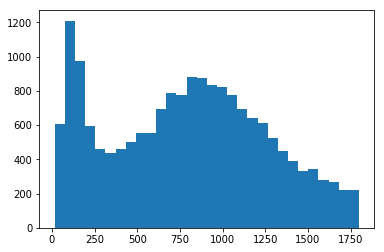

In [4]:
df_fast = df[df['Time']<1800]['Time']

ax2 = plt.hist(df_fast,bins=30)

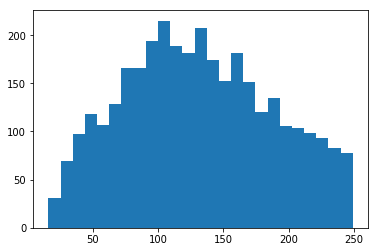

In [5]:
df_super_fast = df[df['Time']<250]['Time']

ax3 = plt.hist(df_super_fast,bins=25)

In [6]:
print(df.shape)
print(df[df['Time']<60].shape)

(23859, 396)
(387, 396)


In [7]:
# Rejecting those who answered questions too fast:
df = df[df['Time']>60]
print(df.shape)

(23463, 396)


In [8]:
# SALARY

In [9]:
def rename_some_salaries(salary):
    salary_new=salary
    if (salary!=salary): salary_new='-1'
    elif (salary=='I do not wish to disclose my approximate yearly compensation'): salary_new='secret'
    return salary_new

In [10]:
print(df['Q9'].unique())
df['Q9']=df['Q9'].apply(lambda x: rename_some_salaries(x))
print(df['Q9'].unique())

[nan '10-20,000' '0-10,000'
 'I do not wish to disclose my approximate yearly compensation'
 '20-30,000' '125-150,000' '30-40,000' '50-60,000' '100-125,000'
 '90-100,000' '70-80,000' '80-90,000' '60-70,000' '400-500,000'
 '40-50,000' '150-200,000' '500,000+' '300-400,000' '200-250,000'
 '250-300,000']
['-1' '10-20,000' '0-10,000' 'secret' '20-30,000' '125-150,000'
 '30-40,000' '50-60,000' '100-125,000' '90-100,000' '70-80,000'
 '80-90,000' '60-70,000' '400-500,000' '40-50,000' '150-200,000'
 '500,000+' '300-400,000' '200-250,000' '250-300,000']


In [11]:
df = df[(df['Q9']!='-1') & (df['Q9']!='secret')]
print(df['Q9'].unique())
print('')
print('df.shape =',df.shape)

['10-20,000' '0-10,000' '20-30,000' '125-150,000' '30-40,000' '50-60,000'
 '100-125,000' '90-100,000' '70-80,000' '80-90,000' '60-70,000'
 '400-500,000' '40-50,000' '150-200,000' '500,000+' '300-400,000'
 '200-250,000' '250-300,000']

df.shape = (15423, 396)


In [12]:
# somewhere plot how many many people have nan and don't want to disclose salary, then drop them

print(df['Q9'].unique())
df_salary = df[['Q9']]
print(df_salary['Q9'].shape)
df_salary['Q9'].unique()

['10-20,000' '0-10,000' '20-30,000' '125-150,000' '30-40,000' '50-60,000'
 '100-125,000' '90-100,000' '70-80,000' '80-90,000' '60-70,000'
 '400-500,000' '40-50,000' '150-200,000' '500,000+' '300-400,000'
 '200-250,000' '250-300,000']
(15423,)


array(['10-20,000', '0-10,000', '20-30,000', '125-150,000', '30-40,000',
       '50-60,000', '100-125,000', '90-100,000', '70-80,000', '80-90,000',
       '60-70,000', '400-500,000', '40-50,000', '150-200,000', '500,000+',
       '300-400,000', '200-250,000', '250-300,000'], dtype=object)

In [13]:
all_salaries = ['0-10,000','10-20,000','20-30,000','30-40,000','40-50,000','50-60,000','60-70,000',
                       '70-80,000','80-90,000','90-100,000','100-125,000','125-150,000','150-200,000',
                       '200-250,000','250-300,000','300-400,000','400-500,000','500,000+']

In [14]:
def order_subset(subset,whole_set):
    ordered = ['']*len(subset)
    i = 0
    for s in whole_set:
        if s in subset:
            ordered[i]=s
            i = i+1
    return ordered

In [15]:
subset = ['10-20,000','500,000+','0-10,000']
print(order_subset(subset,all_salaries))
subset = []
print(order_subset(subset,all_salaries))
subset = ['hg']
print(order_subset(subset,all_salaries))

['0-10,000', '10-20,000', '500,000+']
[]
['']


In [16]:
df_Tunisia = df[df['Q3']=='Tunisia']

def N_given_percent(df,percent):
    dict_countries = dict(df['Q3'].value_counts())
    N_tot = df.shape[0]
    N_percent = 0
    i = 1
    for key in dict_countries.keys():
        if (key=='Other'): continue
        if (key=='I do not wish to disclose my location'): continue
        print(i, key, dict_countries[key])
        N_percent += dict_countries[key]
        i += 1
        if (N_percent>=percent*N_tot): break

print('')
percents = [0.5,1.1]
for p in percents:
    print('')
    print('p =',p )
    N_given_percent(df,p)



p = 0.5
1 United States of America 3391
2 India 2320
3 China 870
4 Russia 581
5 Brazil 557

p = 1.1
1 United States of America 3391
2 India 2320
3 China 870
4 Russia 581
5 Brazil 557
6 Germany 506
7 United Kingdom of Great Britain and Northern Ireland 495
8 Canada 441
9 France 422
10 Japan 411
11 Spain 364
12 Italy 244
13 Australia 232
14 Poland 214
15 Turkey 199
16 Netherlands 193
17 Ukraine 165
18 Mexico 152
19 Singapore 132
20 Nigeria 132
21 Israel 124
22 Sweden 118
23 Switzerland 115
24 South Korea 114
25 South Africa 112
26 Portugal 105
27 Indonesia 103
28 Colombia 101
29 Argentina 99
30 Viet Nam 96
31 Pakistan 90
32 Greece 83
33 Denmark 81
34 Malaysia 75
35 Belgium 73
36 Ireland 72
37 Hungary 68
38 Belarus 65
39 Chile 60
40 Egypt 55
41 New Zealand 55
42 Iran, Islamic Republic of... 55
43 Bangladesh 55
44 Peru 54
45 Norway 53
46 Kenya 53
47 Finland 52
48 Romania 51
49 Philippines 49
50 Czech Republic 48
51 Republic of Korea 45
52 Thailand 45
53 Hong Kong (S.A.R.) 43
54 Austria 4

In [17]:
def print_dict(d):
    for key in d:
        print(key,int(d[key]))
        

def ranges_to_numerical(df, col_name='Q9', whole_set = all_salaries):
    subset = df[col_name].unique()
    ordered_subset = order_subset(subset,whole_set)
    dict_ranges = dict(df[col_name].value_counts())
    N_tot = df.shape[0]
    N_values = len(ordered_subset)
    N_values1 = len(dict_ranges)
    if (N_values!=N_values1):
        print('In ranges_to_numerical: (N_values!=N_values1)')
        return
    Ns_given_range = [0]*N_values
    percentile = 0
    ordered_dict = {}
    for key in ordered_subset:
        N_i = dict_ranges[key]
        percentile = percentile+100*N_i/N_tot
        ordered_dict[key] = percentile
    return ordered_dict

In [18]:
ordered_dict = ranges_to_numerical(df_Tunisia, col_name='Q9', whole_set = all_salaries)
print_dict(ordered_dict)

0-10,000 74
10-20,000 80
20-30,000 85
30-40,000 94
50-60,000 97
200-250,000 100


In [19]:
# How many countries have >50% of data scientists making 0-10'000
dict_countries = dict(df['Q3'].value_counts())
i=1
for country in dict_countries.keys():
    ordered_dict = ranges_to_numerical(df[df['Q3']==country], col_name='Q9', whole_set = all_salaries)
    if ('0-10,000') in ordered_dict.keys():
        if (ordered_dict['0-10,000']>=50):
            print(i,country,int(ordered_dict['0-10,000']))
            i+=1

1 India 56
2 China 52
3 Turkey 51
4 Nigeria 78
5 Indonesia 69
6 Viet Nam 64
7 Pakistan 63
8 Egypt 72
9 Iran, Islamic Republic of... 74
10 Bangladesh 78
11 Peru 53
12 Philippines 61
13 Morocco 51
14 Tunisia 74


In [28]:
df['Q13_Part_1'].unique()

array([nan, 'Jupyter/IPython'], dtype=object)